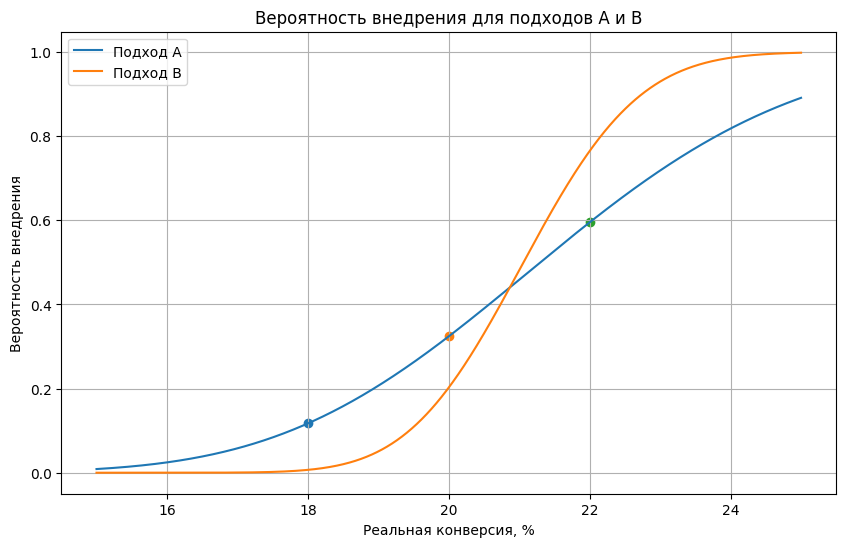

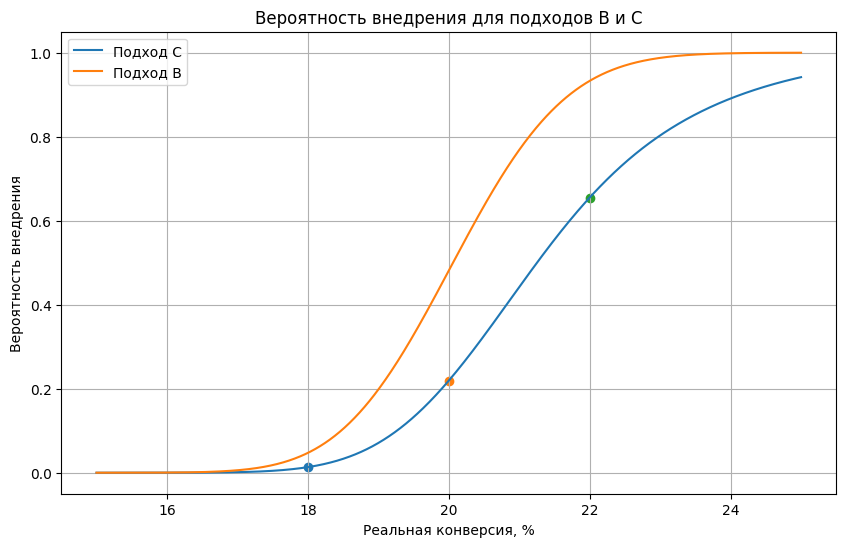

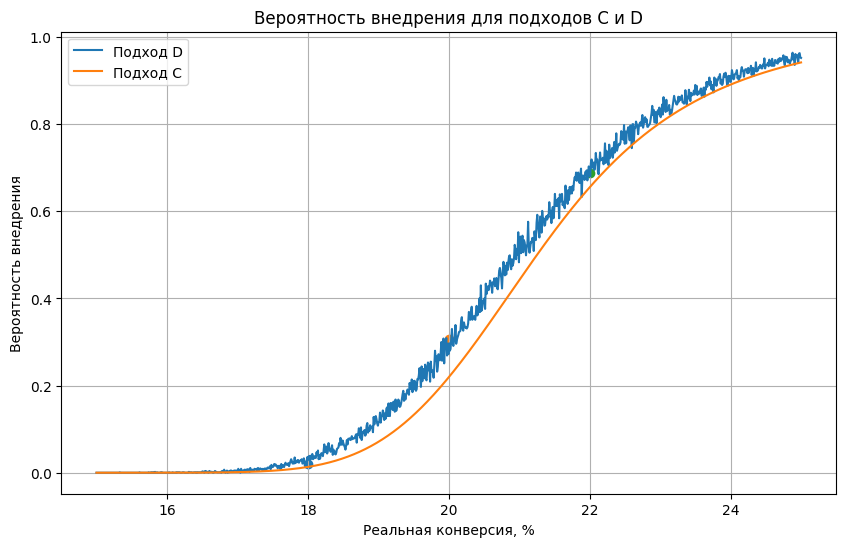

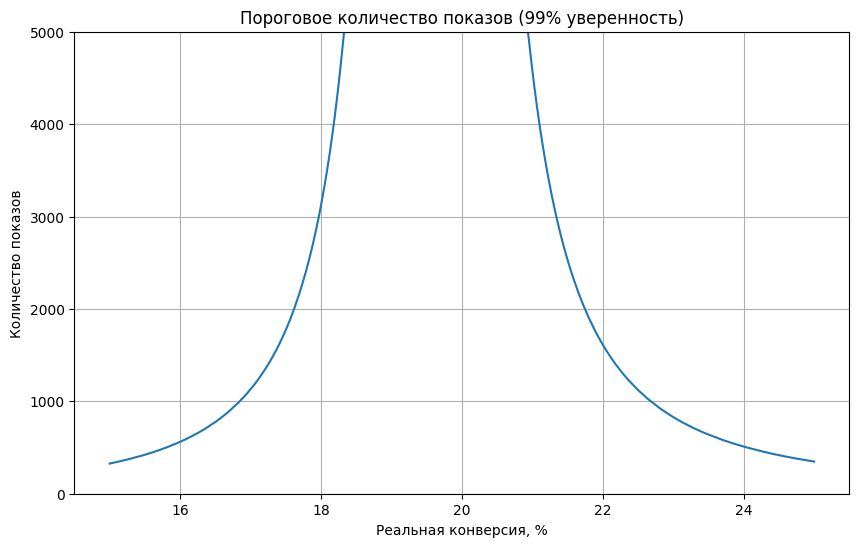

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

def calc_prob_implementation(true_conv, n_shows, threshold):
    successes = np.arange(n_shows + 1)
    probs = binom.pmf(successes, n_shows, true_conv)
    return np.sum(probs[successes/n_shows > threshold])

def plot_implementation_prob(true_convs, n_shows, threshold, label):
    probs = [calc_prob_implementation(c, n_shows, threshold) for c in true_convs]
    plt.plot(true_convs * 100, probs, label=label)
    plt.grid(True)
    plt.xlabel('Реальная конверсия, %')
    plt.ylabel('Вероятность внедрения')

# Подход A и B
true_convs = np.linspace(0.15, 0.25, 1000)
plt.figure(figsize=(10, 6))
plot_implementation_prob(true_convs, 200, 0.21, 'Подход A')
plot_implementation_prob(true_convs, 1000, 0.21, 'Подход B')
plt.title('Вероятность внедрения для подходов A и B')
for conv in [0.18, 0.20, 0.22]:
    plt.scatter([conv * 100], [calc_prob_implementation(conv, 200, 0.21)], marker='o')
plt.legend()
plt.show()

# Подход C (двухэтапный)
def calc_prob_two_stage(true_conv):
    first_stage_probs = binom.pmf(np.arange(201), 200, true_conv)
    second_stage_probs = binom.pmf(np.arange(801), 800, true_conv)
    
    prob = 0
    for s1 in range(201):
        if s1/200 > 0.20:
            for s2 in range(801):
                if s2/800 > 0.20:
                    prob += first_stage_probs[s1] * second_stage_probs[s2]
    return prob

probs_c = [calc_prob_two_stage(c) for c in true_convs]

plt.figure(figsize=(10, 6))
plt.plot(true_convs * 100, probs_c, label='Подход C')
plot_implementation_prob(true_convs, 1000, 0.20, 'Подход B')
plt.title('Вероятность внедрения для подходов B и C')
for conv in [0.18, 0.20, 0.22]:
    plt.scatter([conv * 100], [calc_prob_two_stage(conv)], marker='o')
plt.legend()
plt.grid(True)
plt.show()

# Подход D (непрерывный)
def simulate_continuous_implementation(true_conv, n_sims=1000):
    implementations = 0
    for _ in range(n_sims):
        conversions = 0
        total_shows = 0
        continue_flag = True
        while continue_flag and total_shows < 1000:
            if total_shows < 200:
                new_shows = 200 - total_shows
            else:
                new_shows = min(100, 1000 - total_shows)
            
            new_conversions = np.random.binomial(new_shows, true_conv)
            conversions += new_conversions
            total_shows += new_shows
            
            if conversions/total_shows < 0.196:
                continue_flag = False
            elif total_shows >= 1000:
                implementations += 1
                break
    
    return implementations/n_sims

probs_d = [simulate_continuous_implementation(c) for c in true_convs]

plt.figure(figsize=(10, 6))
plt.plot(true_convs * 100, probs_d, label='Подход D')
plt.plot(true_convs * 100, probs_c, label='Подход C')
plt.title('Вероятность внедрения для подходов C и D')
for conv in [0.18, 0.20, 0.22]:
    plt.scatter([conv * 100], [simulate_continuous_implementation(conv)], marker='o')
plt.legend()
plt.grid(True)
plt.xlabel('Реальная конверсия, %')
plt.ylabel('Вероятность внедрения')
plt.show()

def calc_threshold_shows(true_conv, confidence=0.99, max_shows=5000):
    min_shows = 200  
    target_conv = 0.196  
    
    p = true_conv
    q = 1 - p
    
    z = 2.326  # z-score для 99% confidence
    d = abs(p - target_conv) 
    
    if d == 0:
        return max_shows
        
    n = (z**2 * p * q) / (d**2)
    n = max(min_shows, min(max_shows, int(np.ceil(n))))
    
    return n

threshold_shows = [calc_threshold_shows(c) for c in true_convs]

plt.figure(figsize=(10, 6))
plt.plot(true_convs * 100, threshold_shows)
plt.title('Пороговое количество показов (99% уверенность)')
plt.xlabel('Реальная конверсия, %')
plt.ylabel('Количество показов')
plt.grid(True)
plt.ylim(0, 5000)
plt.show()

# Presentation
https://docs.google.com/presentation/d/1GjIEmjIHorTVGOOxgoKIvuBkXWhOcteYjtaCaqcbeu4/edit?usp=sharing